<b>Visualizing a Decision Tree</b>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [5]:
'''You can visualize the trained Decision Tree by first using the export_graphviz()
method to output a graph definition file called iris_tree.dot:'''

import os

f = open("D:/Datasets/iris_tree.dot", 'w')

from sklearn.tree import export_graphviz
export_graphviz(
tree_clf,
out_file=f,
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

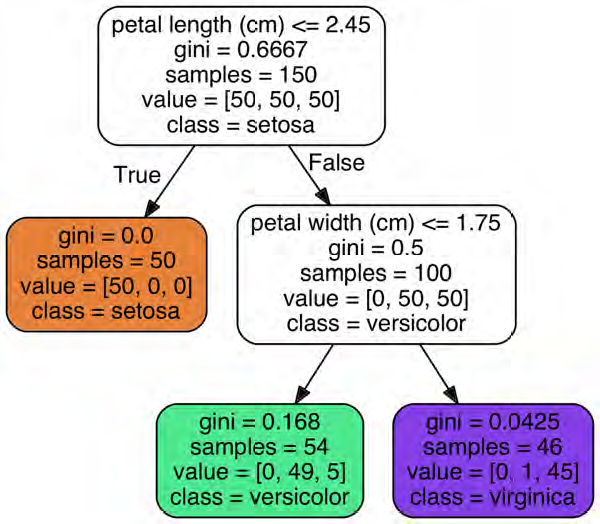

Model Interpretation: White Box Versus Black Box

As you can see Decision Trees are fairly intuitive and their decisions are easy to interpret.
Such models are often called white box models. In contrast, as we will see, Random
Forests or neural networks are generally considered black box models. They
make great predictions, and you can easily check the calculations that they performed
to make these predictions; nevertheless, it is usually hard to explain in simple terms
why the predictions were made

Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two children.

Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular
class k: first it traverses the tree to find the leaf node for this instance, and then it
returns the ratio of training instances of class k in this node.

<b>The CART Training Algorithm</b>

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train
Decision Trees (also called “growing” trees). The idea is really quite simple: the algorithm
first splits the training set in two subsets using a single feature k and a threshold
tk

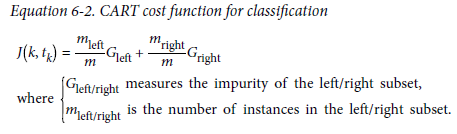

Once it has successfully split the training set in two, it splits the subsets using the
same logic, then the sub-subsets and so on, recursively. It stops recursing once it reaches
the maximum depth (defined by the max_depth hyperparameter), or if it cannot
find a split that will reduce impurity

Unfortunately, finding the optimal tree is known to be an NP-Complete problem:2 it
requires O(exp(m)) time, making the problem intractable even for fairly small training
sets. This is why we must settle for a “reasonably good” solution.

<b>Computational Complexity</b>

Making predictions requires traversing the Decision Tree from the root to a leaf.
Decision Trees are generally approximately balanced, so traversing the Decision Tree
requires going through roughly O(log2(m)) nodes.3 Since each node only requires
checking the value of one feature, the overall prediction complexity is just O(log2(m)),
independent of the number of features. So predictions are very fast, even when dealing
with large training sets.
However, the training algorithm compares all features (or less if max_features is set)
on all samples at each node. This results in a training complexity of O(n × m log(m)).
For small training sets (less than a few thousand instances), Scikit-Learn can speed up
training by presorting the data

So should you use Gini impurity or entropy? The truth is, most of the time it does not
make a big difference: they lead to similar trees. Gini impurity is slightly faster to
compute, so it is a good default. However, when they differ, Gini impurity tends to
isolate the most frequent class in its own branch of the tree, while entropy tends to
produce slightly more balanced trees. A reduction of entropy is often called an information gain.

<b>Regularization Hyperparameters</b>

If left unconstrained, the tree structure will adapt itself to the training data, fitting it very
closely, and most likely overfitting it. Such a model is often called a nonparametric
model, not because it does not have any parameters (it often has a lot) but because the
number of parameters is not determined prior to training, so the model structure is
free to stick closely to the data. 

In contrast, a parametric model such as a linear model
has a predetermined number of parameters, so its degree of freedom is limited,
reducing the risk of overfitting (but increasing the risk of underfitting).
To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. 

As you know by now, this is called regularization. The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. 

In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting.


The DecisionTreeClassifier class has a few other parameters that similarly restrict
the shape of the Decision Tree:

min_samples_split (the minimum number of samples a node must have before it can be split), 
min_samples_leaf (the minimum number of samples a leaf node must have), 
min_weight_fraction_leaf (same as min_samples_leaf expressed as a fraction of the total no. of weighted instances), 
max_leaf_nodes (maximum number of leaf nodes), and max_features(maximum number of features that are evaluated for splitting at each node). 


Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize themodel.

Other algorithms work by first training the Decision Tree without
restrictions, then pruning (deleting) unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the
purity improvement it provides is not statistically significant. Standard
statistical tests, such as the χ2 test, are used to estimate the
probability that the improvement is purely the result of chance
(which is called the null hypothesis). If this probability, called the pvalue,
is higher than a given threshold (typically 5%, controlled by
a hyperparameter), then the node is considered unnecessary and its
children are deleted. The pruning continues until all unnecessary
nodes have been pruned.|

<b>Regression

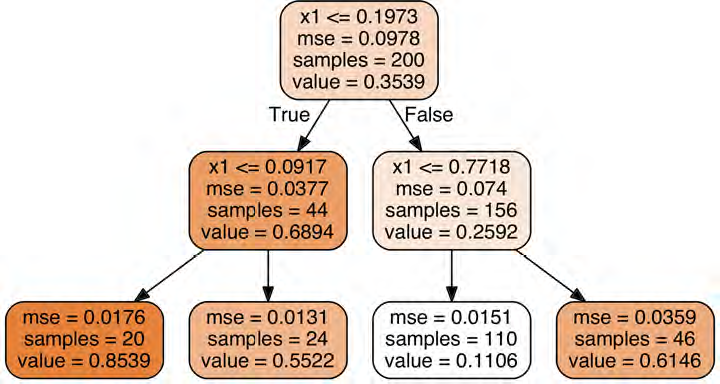

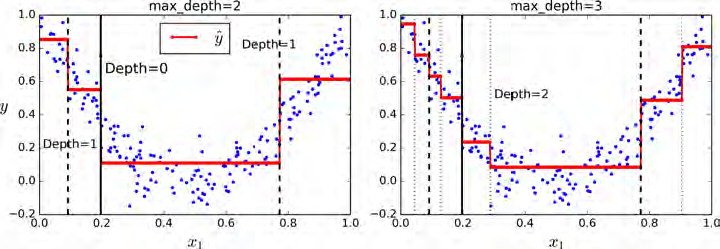

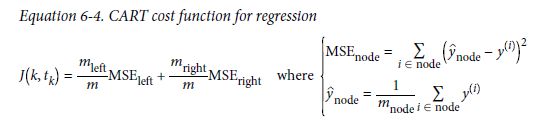

<b>Instability</b>

Hopefully by now you are convinced that Decision Trees have a lot going for them:
they are simple to understand and interpret, easy to use, versatile, and powerful.
However they do have a few limitations. First, as you may have noticed, Decision
Trees love orthogonal decision boundaries (all splits are perpendicular to an axis),
which makes them sensitive to training set rotation.

Although both Decision Trees fit the training set perfectly, it is very
likely that the model on the right will not generalize well. One way to limit this problem
is to use PCA

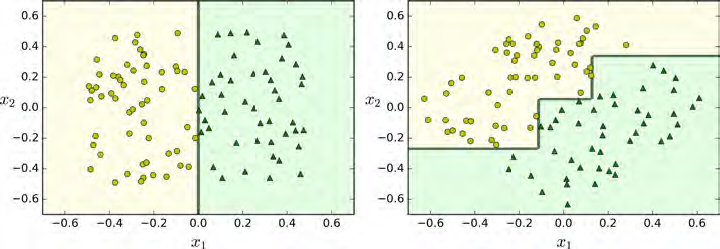

More generally, the main issue with Decision Trees is that they are very sensitive to
small variations in the training data. For example, if you just remove the widest Iris-
Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide)
and train a new Decision Tree, you may get the model represented in Figure 6-8. As
you can see, it looks very different from the previous Decision Tree (Figure 6-2).
Actually, since the training algorithm used by Scikit-Learn is stochastic6 you may
get very different models even on the same training data (unless you set the
random_state hyperparameter).

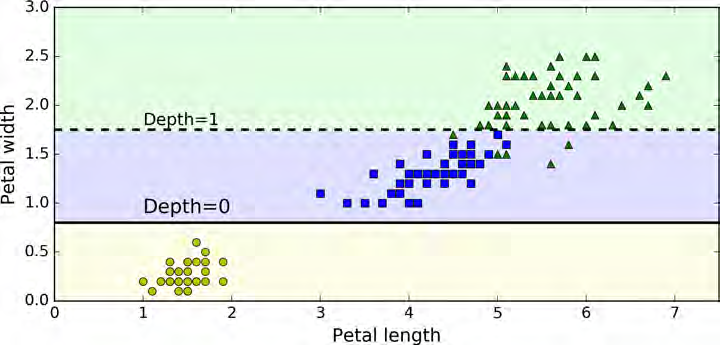